In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!unzip -q "/content/drive/My Drive/3GroupsData.zip" -d "/content/"


In [ ]:
import cv2
import time
import numpy as np 
import os
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
import glob
import matplotlib.pyplot as plt
from keras import backend as K
import keras
import matplotlib.pyplot as plt
import glob
from keras.preprocessing import image
import tensorflow_addons as tfa
from keras.applications import ResNet50 

In [ ]:
def unet(pretrained_weights = None,input_size = (256,256,3)):
    img = Input(input_size)
    model = ResNet50(
    weights = 'imagenet',
    include_top = False, 
    input_shape = input_size, 
    pooling = 'max'
    )
    final_layer = model.layers[-1].output
    print(final_layer)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(final_layer)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)
    pool5 = MaxPooling2D(pool_size=(2, 2))(drop5)
    
    F1=Flatten()(pool5)
    d1=Dense(1024,activation='relu')(F1)
    d2=Dense(512,activation='relu')(d1)
    d2_1=Dense(256,activation='relu')(d2)
    d2_1=Dense(64,activation='relu')(d2_1)
    d2_1=Dense(1,activation='sigmoid')(d2_1)
    
    d2_2=Dense(256,activation='relu')(d2)
    d2_2=Dense(64,activation='relu')(d2_2)
    d2_2=Dense(1,activation='sigmoid')(d2_2)
    
    
    d2_3=Dense(256,activation='relu')(d2)
    d2_3=Dense(64,activation='relu')(d2_3)
    d2_3=Dense(1,activation='sigmoid')(d2_3)
    
    d2_4=Dense(256,activation='relu')(d2)
    d2_4=Dense(64,activation='relu')(d2_4)
    d2_4=Dense(1,activation='sigmoid')(d2_4)
    
    d2_5=Dense(256,activation='relu')(d2)
    d2_5=Dense(64,activation='relu')(d2_5)
    d2_5=Dense(1,activation='sigmoid')(d2_5)
    
    d2_6=Dense(256,activation='relu')(d2)
    d2_6=Dense(64,activation='relu')(d2_6)
    d2_6=Dense(1,activation='sigmoid')(d2_6)
    
    d2_7=Dense(256,activation='relu')(d2)
    d2_7=Dense(64,activation='relu')(d2_7)
    d2_7=Dense(1,activation='sigmoid')(d2_7)
    
    d2_8=Dense(256,activation='relu')(d2)
    d2_8=Dense(64,activation='relu')(d2_8)
    d2_8=Dense(1,activation='sigmoid')(d2_8)
    
    d2_9=Dense(256,activation='relu')(d2)
    d2_9=Dense(64,activation='relu')(d2_9)
    d2_9=Dense(1,activation='sigmoid')(d2_9)
    
    d2_10=Dense(256,activation='relu')(d2)
    d2_10=Dense(64,activation='relu')(d2_10)
    d2_10=Dense(1,activation='sigmoid')(d2_10)
    
    d2_11=Dense(256,activation='relu')(d2)
    d2_11=Dense(64,activation='relu')(d2_11)
    d2_11=Dense(1,activation='sigmoid')(d2_11)
    
    d2_12=Dense(256,activation='relu')(d2)
    d2_12=Dense(64,activation='relu')(d2_12)
    d2_12=Dense(1,activation='sigmoid')(d2_12)
    
    model = Model(input = inputs, output = [d2_1,d2_2,d2_3,d2_4,d2_5,d2_6,d2_7,d2_8,d2_9,d2_10,d2_11,d2_12])
    
    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy',metrics=['accuracy'])
    
    
    if(pretrained_weights):
        model.load_weights(pretrained_weights)
        
    return model

In [ ]:
model=unet()

In [ ]:
import glob
    

In [ ]:
import pandas as pd  

data = pd.read_csv('/content/drive/My Drive/AllLabels.csv')

In [ ]:
data

,content,High Building Density,Moderate Building Density,Low Building Density,Regular Layout,Irregular Layout,Dense Greenery,Sparse Greenery,Very Sparse Greenery,Grass,Trees,Large Buildings,Exposed Soil
0,imageNo_821.png,0,0,1,1,0,1,0,0,1,1,1,0
1,imageNo_818.png,1,0,0,0,1,0,1,0,0,1,1,0
2,imageNo_807.png,1,0,0,0,1,0,1,0,1,1,0,1
3,imageNo_820.png,0,1,0,1,0,0,1,0,0,1,1,0
4,imageNo_813.png,1,0,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6243,imageNo_1633.png,0,1,0,0,1,0,1,0,1,1,1,1
6244,imageNo_2079.png,1,0,0,0,1,0,0,1,0,1,0,1
6245,imageNo_1668.png,0,1,0,0,1,0,1,0,1,1,1,0
6246,imageNo_1757.png,1,0,0,0,1,0,0,1,0,0,1,0


In [ ]:
train_x,train_y =[],[]
# rows["Peshawar_1-1tile_11000-10200.png"]
for filename in glob.glob('/content/3GroupsData' + '/*.png' ):
    im=plt.imread(filename)
    filenameExact = filename.split('/')[-1].replace('.tif','.png')
    if len(data.loc[data["content"] == filenameExact].values) is not 0:
        #train_y.append(rows[filename.split('\\')[-1]])

        train_y.append(data.loc[data["content"] == filenameExact].values[0][1:])
        train_x.append(im)
    #train_y.append(rows[filename.split('\\')[-1]])
    #print(filename)

In [ ]:
len(train_x)

4678

In [ ]:
train_y

[array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=object),
 array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1], dtype=object),
 array([0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1], dtype=object),
 array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1], dtype=object),
 array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1], dtype=object),
 array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=object),
 array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1], dtype=object),
 array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0], dtype=object),
 array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0], dtype=object),
 array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1], dtype=object),
 array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0], dtype=object),
 array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0], dtype=object),
 array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1], dtype=object),
 array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1], dtype=object),
 array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1], dtype=object),
 array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0], dtype=object),
 array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,

In [ ]:
# train_y = [[0,0,1,1,0,0,1,0,0,1,1,1],
# [0,1,0,0,1,1,0,0,1,1,0,1]]

In [ ]:
validation_x = train_x[:800] 
validation_y = train_y[:800]
train_x = train_x[800:] 
train_y = train_y[800:]

In [ ]:
train_x= np.array(train_x)
train_y =list(map(list, zip(*train_y)))

validation_x= np.array(validation_x)
validation_y =list(map(list, zip(*validation_y)))

In [ ]:
len(validation_y)

12

In [ ]:
list(map(list, zip(*validation_y)))[0]

[1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1]

In [ ]:
model.fit(train_x,train_y,validation_data=(validation_x,validation_y),epochs=8, batch_size=32, verbose=1)


Train on 3878 samples, validate on 800 samples
Epoch 1/8


ResourceExhaustedError: ignored

In [ ]:
len(train_x[1:20])

In [ ]:
model.summary()

NameError: ignored

In [ ]:
model.save("e32GData.h5")

In [ ]:
results  = model.evaluate(validation_x,validation_y,verbose=0)

In [ ]:
labels  = model.predict(validation_x)

In [ ]:
results[-12:]

[0.9087499976158142,
 0.7875000238418579,
 0.8550000190734863,
 0.7487499713897705,
 0.7574999928474426,
 0.8962500095367432,
 0.7362499833106995,
 0.8899999856948853,
 0.7562500238418579,
 0.8450000286102295,
 0.8012499809265137,
 0.800000011920929]

In [ ]:
# New Section
sum(results[-12:])/len(results[-12:])

0.8152083357175192

In [ ]:
img_pred= image.load_img("/content/2GroupsData/Peshawar_1-1tile_0-11000.png",target_size=(256,256))
img_pred= image.img_to_array(img_pred)
img_pred= np.expand_dims(img_pred,axis=0)
model.predict(img_pred)

[array([[0.]], dtype=float32),
 array([[1.7956413e-36]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[0.9982382]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.8678796e-33]], dtype=float32),
 array([[1.]], dtype=float32)]

In [ ]:
img_pred= image.load_img("/content/2GroupsData/imageNo_1617.png",target_size=(256,256))
img_pred= image.img_to_array(img_pred)
img_pred= np.expand_dims(img_pred,axis=0)
model.predict(img_pred)

[array([[1.]], dtype=float32),
 array([[7.6461017e-28]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[1.0397109e-33]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[3.2209335e-09]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[6.578986e-30]], dtype=float32),
 array([[2.583601e-23]], dtype=float32)]

In [ ]:
model.get_weights()

In [ ]:
new_model = load_model("/content/drive/My Drive/e32GData.h5")

In [ ]:
response = new_model.fit(train_x,train_y,validation_data=(validation_x,validation_y),epochs=1, batch_size=32, verbose=1)


Train on 2701 samples, validate on 500 samples
Epoch 1/1
2701/2701 [==============================] - 5982s 2s/step - loss: 5.0136 - dense_5_loss: 0.2885 - dense_8_loss: 0.5311 - dense_11_loss: 0.4012 - dense_14_loss: 0.4887 - dense_17_loss: 0.5097 - dense_20_loss: 0.2223 - dense_23_loss: 0.5277 - dense_26_loss: 0.2900 - dense_29_loss: 0.4889 - dense_32_loss: 0.2644 - dense_35_loss: 0.5216 - dense_38_loss: 0.4780 - dense_5_accuracy: 0.8719 - dense_8_accuracy: 0.7238 - dense_11_accuracy: 0.8245 - dense_14_accuracy: 0.7605 - dense_17_accuracy: 0.7427 - dense_20_accuracy: 0.9137 - dense_23_accuracy: 0.7279 - dense_26_accuracy: 0.8808 - dense_29_accuracy: 0.7656 - dense_32_accuracy: 0.9126 - dense_35_accuracy: 0.7453 - dense_38_accuracy: 0.7497 - val_loss: 6.1079 - val_dense_5_loss: 0.3854 - val_dense_8_loss: 0.5964 - val_dense_11_loss: 0.5126 - val_dense_14_loss: 0.5470 - val_dense_17_loss: 0.5583 - val_dense_20_loss: 0.3435 - val_dense_23_loss: 0.5784 - val_dense_26_loss: 0.4202 - val_de

In [ ]:
new_model.save("/content/e32GData_1e.h5")

In [ ]:
#NEW MODEL PHASE 2

In [ ]:
new_model2 = load_model("/content/drive/My Drive/e32GData_1e.h5")

In [ ]:
response2 = new_model2.fit(train_x,train_y,validation_data=(validation_x,validation_y),epochs=1, batch_size=32, verbose=1)


Train on 2701 samples, validate on 500 samples
Epoch 1/1
2701/2701 [==============================] - 5955s 2s/step - loss: 4.8778 - dense_5_loss: 0.2738 - dense_8_loss: 0.5159 - dense_11_loss: 0.3930 - dense_14_loss: 0.4833 - dense_17_loss: 0.5044 - dense_20_loss: 0.2095 - dense_23_loss: 0.4996 - dense_26_loss: 0.2708 - dense_29_loss: 0.4812 - dense_32_loss: 0.2611 - dense_35_loss: 0.5168 - dense_38_loss: 0.4687 - dense_5_accuracy: 0.8800 - dense_8_accuracy: 0.7320 - dense_11_accuracy: 0.8197 - dense_14_accuracy: 0.7705 - dense_17_accuracy: 0.7516 - dense_20_accuracy: 0.9211 - dense_23_accuracy: 0.7527 - dense_26_accuracy: 0.8860 - dense_29_accuracy: 0.7690 - dense_32_accuracy: 0.9130 - dense_35_accuracy: 0.7549 - dense_38_accuracy: 0.7579 - val_loss: 5.8247 - val_dense_5_loss: 0.3586 - val_dense_8_loss: 0.5978 - val_dense_11_loss: 0.4900 - val_dense_14_loss: 0.5564 - val_dense_17_loss: 0.5732 - val_dense_20_loss: 0.3192 - val_dense_23_loss: 0.5912 - val_dense_26_loss: 0.3661 - val_de

In [ ]:
new_model2.save("/content/e32GData_1e_1e.h5")

In [ ]:
new_model_all = load_model("/content/drive/My Drive/e32GData_1e_1e.h5")

In [ ]:
response2 = new_model_all.fit(train_x,train_y,validation_data=(validation_x,validation_y),epochs=1, batch_size=32, verbose=1)


Train on 3878 samples, validate on 800 samples
Epoch 1/1
3878/3878 [==============================] - 8573s 2s/step - loss: 5.0010 - dense_5_loss: 0.2240 - dense_8_loss: 0.4442 - dense_11_loss: 0.3367 - dense_14_loss: 0.5401 - dense_17_loss: 0.5539 - dense_20_loss: 0.2605 - dense_23_loss: 0.5400 - dense_26_loss: 0.3084 - dense_29_loss: 0.5189 - dense_32_loss: 0.3810 - dense_35_loss: 0.4686 - dense_38_loss: 0.4258 - dense_5_accuracy: 0.9020 - dense_8_accuracy: 0.7775 - dense_11_accuracy: 0.8584 - dense_14_accuracy: 0.7339 - dense_17_accuracy: 0.7148 - dense_20_accuracy: 0.8889 - dense_23_accuracy: 0.7120 - dense_26_accuracy: 0.8871 - dense_29_accuracy: 0.7367 - dense_32_accuracy: 0.8345 - dense_35_accuracy: 0.7824 - dense_38_accuracy: 0.8020 - val_loss: 5.9974 - val_dense_5_loss: 0.3074 - val_dense_8_loss: 0.5264 - val_dense_11_loss: 0.4443 - val_dense_14_loss: 0.5918 - val_dense_17_loss: 0.6041 - val_dense_20_loss: 0.3457 - val_dense_23_loss: 0.5899 - val_dense_26_loss: 0.4177 - val_de

In [ ]:
new_model_all.save("/content/e32GData_1e_1e_AD1e.h5")

In [ ]:
results = new_model_all.evaluate(validation_x,validation_y)
print(results)
print(sum(results[-12:])/len(results[-12:]))

800/800 [==============================] - 445s 556ms/step
[5.9974015426635745, 0.30735352635383606, 0.5263662338256836, 0.4442905783653259, 0.5918360948562622, 0.6040603518486023, 0.34571564197540283, 0.589870810508728, 0.4177207946777344, 0.5748371481895447, 0.48672401905059814, 0.5955781936645508, 0.5130482316017151, 0.9075000286102295, 0.7862499952316284, 0.8762500286102295, 0.7549999952316284, 0.7275000214576721, 0.9125000238418579, 0.7337499856948853, 0.8650000095367432, 0.7087500095367432, 0.8362500071525574, 0.7425000071525574, 0.7837499976158142]
0.8029166758060455


In [ ]:
response2 = new_model_all.fit(train_x,train_y,validation_data=(validation_x,validation_y),epochs=1, batch_size=32, verbose=1)


Train on 3878 samples, validate on 800 samples
Epoch 1/1
3878/3878 [==============================] - 8782s 2s/step - loss: 4.8467 - dense_5_loss: 0.2238 - dense_8_loss: 0.4314 - dense_11_loss: 0.3275 - dense_14_loss: 0.5184 - dense_17_loss: 0.5350 - dense_20_loss: 0.2498 - dense_23_loss: 0.5201 - dense_26_loss: 0.2870 - dense_29_loss: 0.5107 - dense_32_loss: 0.3628 - dense_35_loss: 0.4635 - dense_38_loss: 0.4097 - dense_5_accuracy: 0.9036 - dense_8_accuracy: 0.7816 - dense_11_accuracy: 0.8556 - dense_14_accuracy: 0.7450 - dense_17_accuracy: 0.7267 - dense_20_accuracy: 0.8943 - dense_23_accuracy: 0.7357 - dense_26_accuracy: 0.8860 - dense_29_accuracy: 0.7468 - dense_32_accuracy: 0.8476 - dense_35_accuracy: 0.7875 - dense_38_accuracy: 0.8022 - val_loss: 5.5625 - val_dense_5_loss: 0.2640 - val_dense_8_loss: 0.4876 - val_dense_11_loss: 0.3909 - val_dense_14_loss: 0.5865 - val_dense_17_loss: 0.6068 - val_dense_20_loss: 0.3163 - val_dense_23_loss: 0.5735 - val_dense_26_loss: 0.3693 - val_de

In [ ]:
new_model_all.save("/content/e32GData_1e_1e_AD1e_1e.h5")

In [ ]:
response2 = new_model_all.fit(train_x,train_y,validation_data=(validation_x,validation_y),epochs=1, batch_size=32, verbose=1)


Train on 3878 samples, validate on 800 samples
Epoch 1/1
3878/3878 [==============================] - 8764s 2s/step - loss: 4.6255 - dense_5_loss: 0.2080 - dense_8_loss: 0.4051 - dense_11_loss: 0.3024 - dense_14_loss: 0.4928 - dense_17_loss: 0.5134 - dense_20_loss: 0.2363 - dense_23_loss: 0.4998 - dense_26_loss: 0.2786 - dense_29_loss: 0.4907 - dense_32_loss: 0.3514 - dense_35_loss: 0.4529 - dense_38_loss: 0.3947 - dense_5_accuracy: 0.9095 - dense_8_accuracy: 0.7916 - dense_11_accuracy: 0.8664 - dense_14_accuracy: 0.7540 - dense_17_accuracy: 0.7398 - dense_20_accuracy: 0.9023 - dense_23_accuracy: 0.7527 - dense_26_accuracy: 0.8938 - dense_29_accuracy: 0.7705 - dense_32_accuracy: 0.8504 - dense_35_accuracy: 0.7811 - dense_38_accuracy: 0.8159 - val_loss: 5.7262 - val_dense_5_loss: 0.2849 - val_dense_8_loss: 0.5029 - val_dense_11_loss: 0.4357 - val_dense_14_loss: 0.5788 - val_dense_17_loss: 0.5836 - val_dense_20_loss: 0.3670 - val_dense_23_loss: 0.5878 - val_dense_26_loss: 0.3845 - val_de

In [ ]:
new_model_all.save("/content/e32GData_1e_1e_AD1e_1e_1e.h5")

In [ ]:
new_model_all2 = load_model("/content/e32GData_1e_1e_AD1e_1e_1e.h5")

In [ ]:
response2 = new_model_all2.fit(train_x,train_y,validation_data=(validation_x,validation_y),epochs=1, batch_size=32, verbose=1)


Train on 3878 samples, validate on 800 samples
Epoch 1/1
2272/3878 [================>.............] - ETA: 57:18 - loss: 4.4526 - dense_5_loss: 0.1973 - dense_8_loss: 0.3650 - dense_11_loss: 0.2764 - dense_14_loss: 0.4739 - dense_17_loss: 0.4883 - dense_20_loss: 0.2274 - dense_23_loss: 0.4841 - dense_26_loss: 0.2717 - dense_29_loss: 0.4948 - dense_32_loss: 0.3434 - dense_35_loss: 0.4402 - dense_38_loss: 0.3902 - dense_5_accuracy: 0.9142 - dense_8_accuracy: 0.8319 - dense_11_accuracy: 0.8908 - dense_14_accuracy: 0.7742 - dense_17_accuracy: 0.7579 - dense_20_accuracy: 0.8992 - dense_23_accuracy: 0.7575 - dense_26_accuracy: 0.8864 - dense_29_accuracy: 0.7566 - dense_32_accuracy: 0.8442 - dense_35_accuracy: 0.7918 - dense_38_accuracy: 0.8226

KeyboardInterrupt: ignored

In [ ]:
new_model_all2.save("/content/e32GData_1e_1e_AD1e_1e_1e_1e.h5")

In [ ]:
new_model_all2 = load_model("/content/e32GData_1e_1e_AD1e_1e_1e.h5")
results = new_model_all2.evaluate(validation_x,validation_y)
print(results)
print(sum(results[-12:])/len(results[-12:]))

800/800 [==============================] - 447s 559ms/step
[5.7262163162231445, 0.28490516543388367, 0.502893328666687, 0.43569064140319824, 0.5788265466690063, 0.5835719704627991, 0.367043673992157, 0.5877869725227356, 0.3845367431640625, 0.5712087750434875, 0.40008077025413513, 0.5388109087944031, 0.4908607602119446, 0.8849999904632568, 0.7762500047683716, 0.8725000023841858, 0.7300000190734863, 0.7200000286102295, 0.9162499904632568, 0.7024999856948853, 0.856249988079071, 0.7425000071525574, 0.8525000214576721, 0.7887499928474426, 0.8187500238418579]
0.8051041712363561


In [ ]:
sum(results[-12:])/12

0.8051041712363561

In [ ]:
predicted_y = new_model_all2.predict(validation_x)

In [ ]:
results[-12:]


[0.8849999904632568,
 0.7762500047683716,
 0.8725000023841858,
 0.7300000190734863,
 0.7200000286102295,
 0.9162499904632568,
 0.7024999856948853,
 0.856249988079071,
 0.7425000071525574,
 0.8525000214576721,
 0.7887499928474426,
 0.8187500238418579]

In [ ]:
len(validation_y[0])

800

In [ ]:
validation_y_for_measure = np.array(validation_y).T

In [ ]:
def precision(y_true, y_pred):
    i = set(y_true).intersection(y_pred)
    len1 = len(y_pred)
    if len1 == 0:
        return 0
    else:
        return len(i) / len1


def recall(y_true, y_pred):
    i = set(y_true).intersection(y_pred)
    return len(i) / len(y_true)


def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    if p + r == 0:
        return 0
    else:
        return 2 * (p * r) / (p + r)


In [ ]:
predicted_y

[array([[0.02259648],
        [0.08324653],
        [0.03215379],
        [0.10021201],
        [0.5947127 ],
        [0.6009263 ],
        [0.58447266],
        [0.09904659],
        [0.2633654 ],
        [0.3992841 ],
        [0.06241938],
        [0.20632806],
        [0.03565642],
        [0.15215412],
        [0.08846304],
        [0.10828161],
        [0.07404712],
        [0.07850984],
        [0.08495203],
        [0.08633474],
        [0.3698909 ],
        [0.01934755],
        [0.1543634 ],
        [0.12056977],
        [0.54274637],
        [0.23737723],
        [0.23834938],
        [0.1568538 ],
        [0.16877809],
        [0.06197795],
        [0.3420748 ],
        [0.32696316],
        [0.08052829],
        [0.06380615],
        [0.21030086],
        [0.4409518 ],
        [0.13210389],
        [0.03055993],
        [0.09862733],
        [0.04478034],
        [0.23074225],
        [0.41145542],
        [0.5749098 ],
        [0.3495919 ],
        [0.13811174],
        [0

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

labels = np.array(validation_y[0]).T
predictions = np.array(predicted_y[0]).T

cm = confusion_matrix(labels, predictions)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

ValueError: ignored

In [ ]:
labels

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
new_model_all2.metrics_names

['loss',
 'dense_5_loss',
 'dense_8_loss',
 'dense_11_loss',
 'dense_14_loss',
 'dense_17_loss',
 'dense_20_loss',
 'dense_23_loss',
 'dense_26_loss',
 'dense_29_loss',
 'dense_32_loss',
 'dense_35_loss',
 'dense_38_loss',
 'dense_5_accuracy',
 'dense_8_accuracy',
 'dense_11_accuracy',
 'dense_14_accuracy',
 'dense_17_accuracy',
 'dense_20_accuracy',
 'dense_23_accuracy',
 'dense_26_accuracy',
 'dense_29_accuracy',
 'dense_32_accuracy',
 'dense_35_accuracy',
 'dense_38_accuracy']

In [ ]:
new_model_all2 = load_model("/content/drive/My Drive/e32GData_1e_1e_AD1e_1e_1e.h5")


In [ ]:
results = new_model_all2.evaluate(validation_x,validation_y)
print(results)
print(sum(results[-12:])/len(results[-12:]))

160/800 [=====>........................] - ETA: 6:04

KeyboardInterrupt: ignored

In [ ]:
labels = new_model_all2.predict(validation_x)

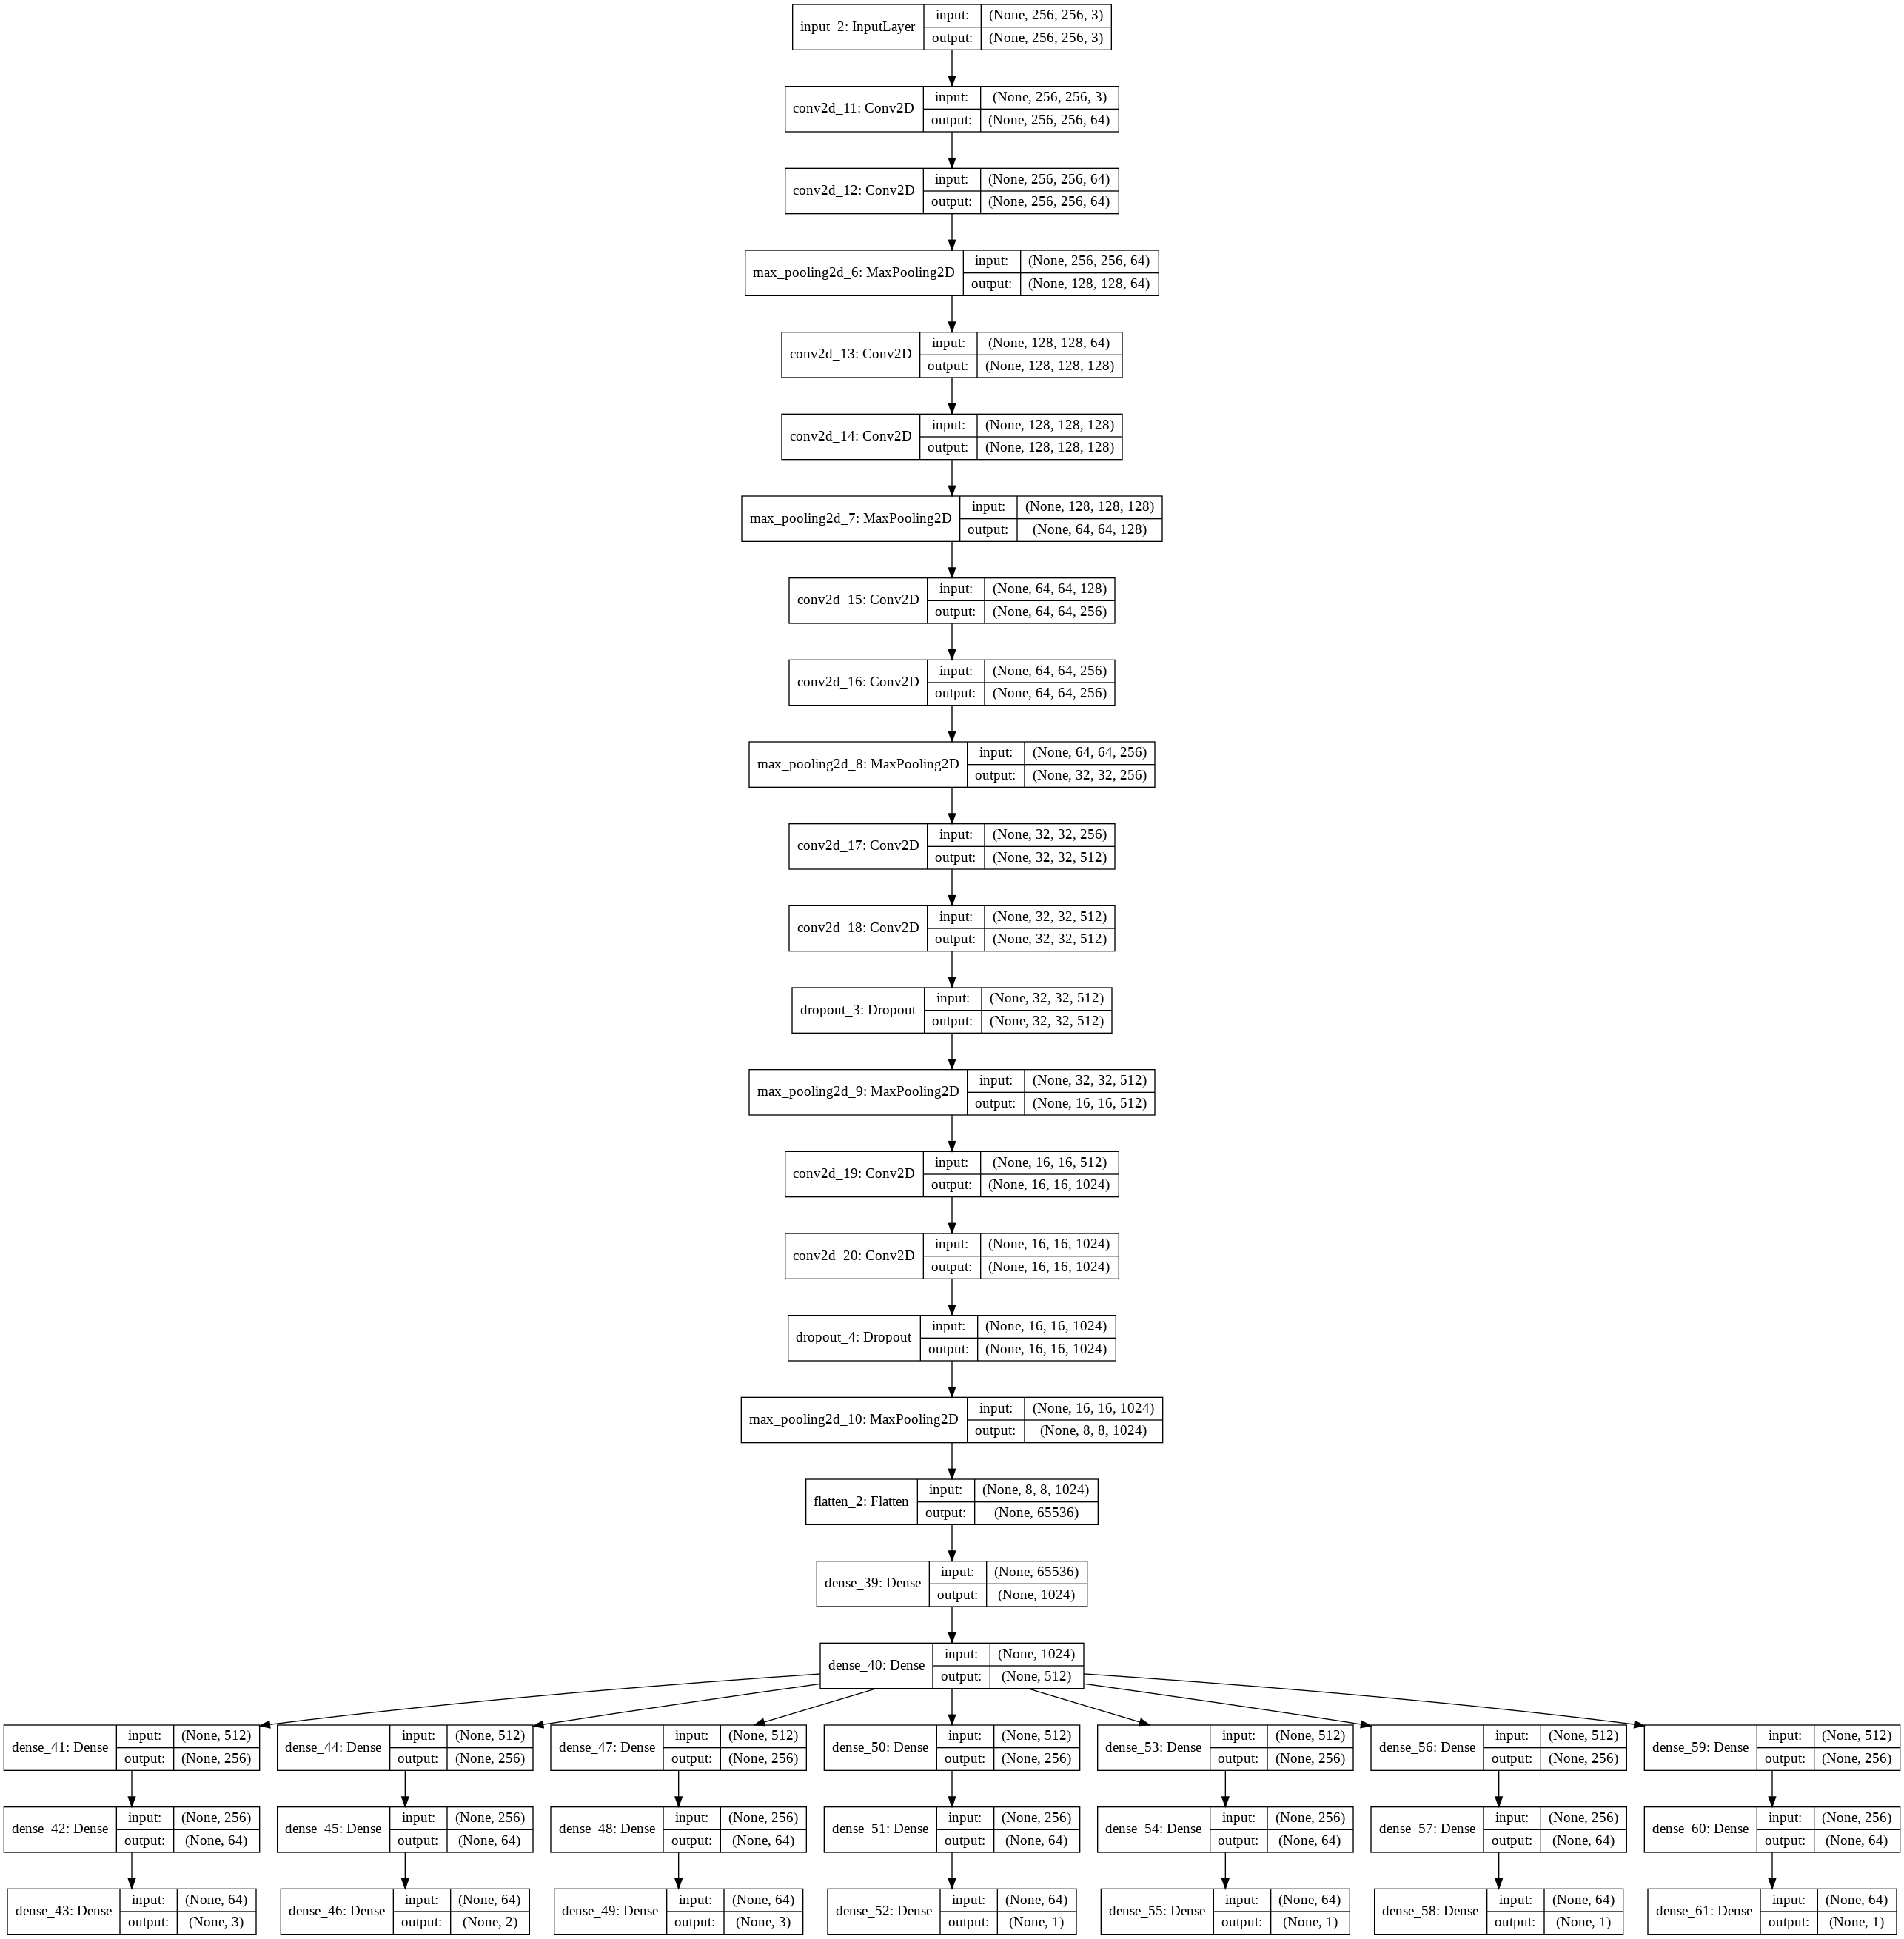

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True,show_layer_names=True)

In [ ]:
a = np.array(labels).T[0][4]

In [ ]:
for row in np.array(labels).T[0]:
  print(row)

[0.08779597 0.27777714 0.56251407 0.2901583  0.6054894  0.5290997
 0.38253528 0.11121479 0.715322   0.7204887  0.2550962  0.56024146]
[0.17037329 0.48088974 0.4810674  0.71709096 0.32045323 0.12093684
 0.8306099  0.09084401 0.75595534 0.9491402  0.3250584  0.6114045 ]
[0.35669205 0.57924646 0.3018844  0.47489566 0.53398275 0.2009027
 0.5640793  0.43264446 0.55839074 0.7731887  0.4366129  0.516288  ]
[0.07380986 0.1965583  0.7690401  0.43006033 0.5706964  0.27360874
 0.44355538 0.42595097 0.4893285  0.4719576  0.30892336 0.77432775]
[0.24202144 0.61908215 0.3432706  0.56479716 0.40197647 0.21755704
 0.70582646 0.19811696 0.7073884  0.8512732  0.4136208  0.4477108 ]
[0.17827213 0.5543516  0.45686004 0.5756736  0.43196112 0.28806394
 0.69877106 0.13855854 0.73550045 0.84792423 0.42740557 0.56185496]
[0.450533   0.5391683  0.17344213 0.67244005 0.34009367 0.10088745
 0.47826394 0.36296493 0.47981068 0.7267145  0.40337756 0.64438266]
[0.10600445 0.41668054 0.6076867  0.46292266 0.52389437 0

In [ ]:
data  [0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1]

KeyError: ignored

In [ ]:
[0.08779597 0.27777714 0.56251407 0.2901583  0.6054894  0.5290997
 0.38253528 0.11121479 0.715322   0.7204887  0.2550962  0.56024146]
[0.17037329 0.48088974 0.4810674  0.71709096 0.32045323 0.12093684
 0.8306099  0.09084401 0.75595534 0.9491402  0.3250584  0.6114045 ]
[0.35669205 0.57924646 0.3018844  0.47489566 0.53398275 0.2009027
 0.5640793  0.43264446 0.55839074 0.7731887  0.4366129  0.516288  ]
[0.07380986 0.1965583  0.7690401  0.43006033 0.5706964  0.27360874
 0.44355538 0.42595097 0.4893285  0.4719576  0.30892336 0.77432775]
[0.24202144 0.61908215 0.3432706  0.56479716 0.40197647 0.21755704
 0.70582646 0.19811696 0.7073884  0.8512732  0.4136208  0.4477108 ]
[0.17827213 0.5543516  0.45686004 0.5756736  0.43196112 0.28806394
 0.69877106 0.13855854 0.73550045 0.84792423 0.42740557 0.56185496]
[0.450533   0.5391683  0.17344213 0.67244005 0.34009367 0.10088745
 0.47826394 0.36296493 0.47981068 0.7267145  0.40337756 0.64438266]
[0.10600445 0.41668054 0.6076867  0.46292266 0.52389437 0.2948612
 0.52530056 0.14451164 0.6696157  0.77938366 0.5297284  0.8141204 ]
[0.59487605 0.36626786 0.29014444 0.40695924 0.60053486 0.21192974
 0.30604288 0.6691454  0.4212975  0.6379213  0.41087657 0.4518177 ]

SyntaxError: ignored

In [ ]:
li = [10,20,30,40]

In [ ]:
a

array([0.24202144, 0.61908215, 0.3432706 , 0.56479716, 0.40197647,
       0.21755704, 0.70582646, 0.19811696, 0.7073884 , 0.8512732 ,
       0.4136208 , 0.4477108 ], dtype=float32)

In [ ]:
building_density_labels = a[:3]
regular_labels = a[3:5]
grenary_labels = a[5:8]

max_building_desnsity = max(building_density_labels)
max_regular = max(regular_labels)
max_grenary = max(grenary_labels)

building_index = 0
regular_index = 0
greenary_index = 0

for index in range(len(building_density_labels)):
  if(building_density_labels[index] == max_building_desnsity):
    print(building_density_labels[index],index)
    building_index = index

for index in range(len(regular_labels)):
  if(regular_labels[index] == max_regular):
    print(regular_labels[index],index+3)
    regular_index = index+3

for index in range(len(grenary_labels)):
  if(grenary_labels[index] == max_grenary):
    print(grenary_labels[index],index+5)
    greenary_index = index+5

list = [0,0,0,0,0,0,0,0,0,0,0,0]

list[building_index] = 1
list[regular_index] = 1
list[greenary_index] = 1
list[8] = 1 if a[8] >= .5 else 0
list[9] = 1 if a[9] >= .5 else 0
list[10] = 1 if a[10] >= .5 else 0
list[11] = 1 if a[11] >= .5 else 0

0.61908215 1
0.56479716 3
0.70582646 6


In [ ]:
len(building_density_labels)

3

In [ ]:
list

[0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0]

In [ ]:
np.array(validation_y).T[4]

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0])

In [ ]:
preducted_y = []

for row in np.array(labels).T[0]:
  building_density_labels = row[:3]
  regular_labels = row[3:5]
  grenary_labels = row[5:8]

  max_building_desnsity = max(building_density_labels)
  max_regular = max(regular_labels)
  max_grenary = max(grenary_labels)

  building_index = 0
  regular_index = 0
  greenary_index = 0

  for index in range(len(building_density_labels)):
    if(building_density_labels[index] == max_building_desnsity):
      print(building_density_labels[index],index)
      building_index = index

  for index in range(len(regular_labels)):
    if(regular_labels[index] == max_regular):
      print(regular_labels[index],index+3)
      regular_index = index+3

  for index in range(len(grenary_labels)):
    if(grenary_labels[index] == max_grenary):
      print(grenary_labels[index],index+5)
      greenary_index = index+5

  list = [0,0,0,0,0,0,0,0,0,0,0,0]

  list[building_index] = 1
  list[regular_index] = 1
  list[greenary_index] = 1
  list[8] = 1 if row[8] >= .5 else 0
  list[9] = 1 if row[9] >= .5 else 0
  list[10] = 1 if row[10] >= .5 else 0
  list[11] = 1 if row[11] >= .5 else 0

  preducted_y.append(list)

0.5723538 0
0.56169194 3
0.40608224 6
0.90378946 2
0.5446301 3
0.38923055 6
0.86907345 2
0.52397734 3
0.4253383 6
0.77234167 0
0.77291286 4
0.8096211 7
0.88917685 2
0.50634295 3
0.4234227 6
0.78440464 0
0.78347933 4
0.8199336 7
0.50081146 0
0.677596 4
0.543298 6
0.8625159 2
0.5146653 3
0.43290383 6
0.80566037 0
0.8067385 4
0.843268 7
0.5328764 1
0.54525024 3
0.53784955 6
0.5130845 1
0.49812505 4
0.6328058 6
0.71243834 2
0.5837135 4
0.5200139 5
0.6594396 2
0.72992826 4
0.44051197 6
0.49206132 1
0.52780217 3
0.6360488 6
0.8462463 2
0.8141939 4
0.42954278 6
0.49736005 1
0.49341884 4
0.7017219 6
0.58487606 1
0.502193 3
0.334334 7
0.5142688 0
0.49057427 4
0.66584444 6
0.5642656 1
0.5524488 4
0.3429338 6
0.4970883 2
0.55959153 3
0.6864126 6
0.8688259 2
0.66230345 4
0.50296366 7
0.52752364 1
0.48309746 3
0.6923101 6
0.58685863 2
0.64266664 4
0.44098625 6
0.7657378 2
0.64082175 4
0.4420811 7
0.6078961 1
0.6636324 4
0.7128919 6
0.5112014 0
0.6348975 4
0.66305923 6
0.51005465 1
0.669776 4
0.4868

In [ ]:
preducted_y

[[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1],
 [0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1],
 [0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1],
 [1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1],
 [1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
 [1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0],
 [0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1],
 [1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
 [0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1],
 [0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0],
 [0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1],
 [0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1],
 [0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
 [0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0],
 [0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],
 [1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0],
 [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1],
 [0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1],
 [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1],
 [0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
 [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1],
 [0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0],
 [1, 0, 0, 0, 1, 0, 1, 0,

In [ ]:
import sklearn.metrics as skm


In [ ]:
cm = skm.multilabel_confusion_matrix(np.array(validation_y).T, preducted_y,labels=[0,1,2,3,4,5,6,7,8,9,10,11])
print(cm)

[[[610  46]
  [ 31 113]]

 [[472  76]
  [ 94 158]]

 [[342  59]
  [ 51 348]]

 [[464  74]
  [128 134]]

 [[139 135]
  [ 69 457]]

 [[681  19]
  [ 57  43]]

 [[239 213]
  [ 39 309]]

 [[543  81]
  [ 41 135]]

 [[197  72]
  [123 408]]

 [[ 92  58]
  [ 66 584]]

 [[630  12]
  [147  11]]

 [[135  63]
  [ 97 505]]]


In [ ]:
print(skm.classification_report(np.array(validation_y).T,preducted_y))

              precision    recall  f1-score   support

           0       0.71      0.78      0.75       144
           1       0.68      0.63      0.65       252
           2       0.86      0.87      0.86       399
           3       0.64      0.51      0.57       262
           4       0.77      0.87      0.82       526
           5       0.69      0.43      0.53       100
           6       0.59      0.89      0.71       348
           7       0.62      0.77      0.69       176
           8       0.85      0.77      0.81       531
           9       0.91      0.90      0.90       650
          10       0.48      0.07      0.12       158
          11       0.89      0.84      0.86       602

   micro avg       0.78      0.77      0.78      4148
   macro avg       0.72      0.69      0.69      4148
weighted avg       0.78      0.77      0.76      4148
 samples avg       0.78      0.78      0.77      4148



In [ ]:
len(np.array(validation_y).T)

800

In [ ]:
fields = ['High Building Density (>80%)', 'Moderate Building Density (50%-80%)' , 'Low Building Density(<50%)' , 'Regular Layout', 'Irregular Layout', 'Dense Greenery(>50%)', 'Sparse Greenery (10-50%)', 'Very Sparse Greenery(<5%)', 'Grass', 'Trees', 'Large Buildings', 'Exposed Soil']  


In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def printConfusion_Matrix(c , classes_info , title):
  plt.pause(0.01)
  plt.figure()
  ax= plt.subplot()
  sns_plot = sns.heatmap(c, annot=True, ax = ax  ,cmap='Greens' ,fmt='g');

  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title(title); 
  ax.xaxis.set_ticklabels(classes_info); ax.yaxis.set_ticklabels(classes_info);
  sns_plot.get_figure().savefig(title+".png")

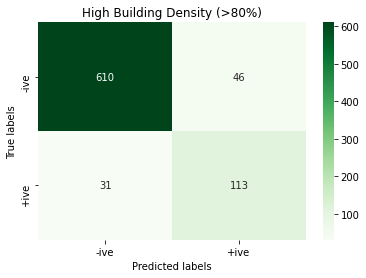

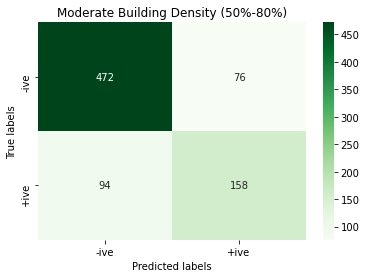

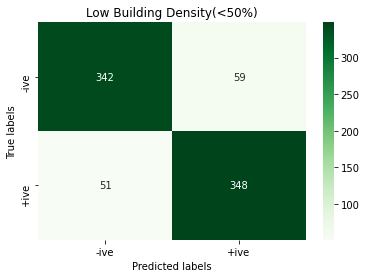

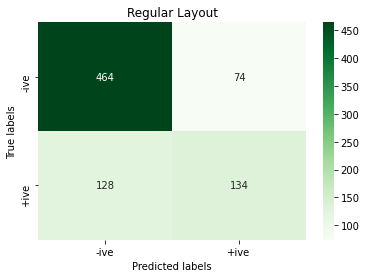

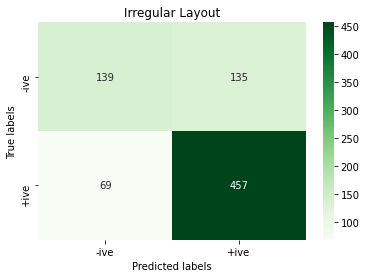

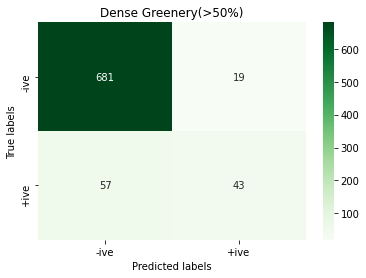

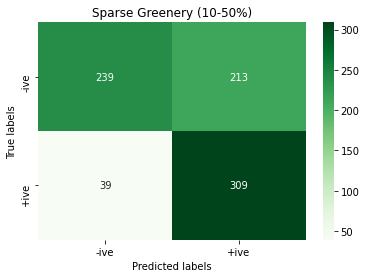

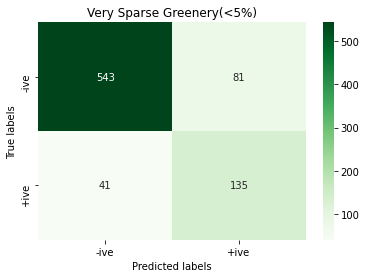

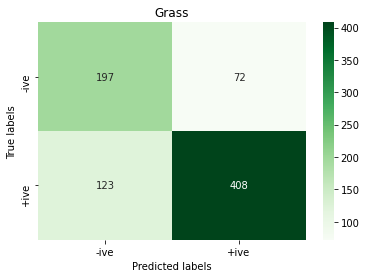

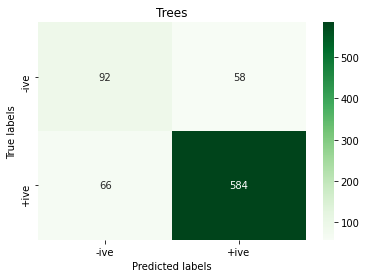

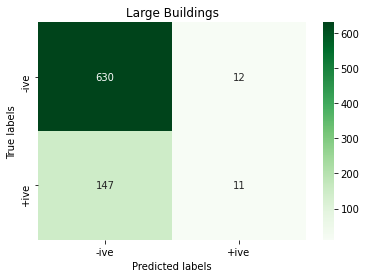

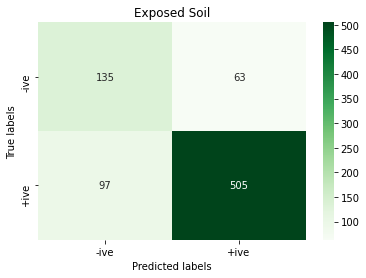

In [ ]:
printConfusion_Matrix(cm[0],['-ive','+ive'] , fields[0])
printConfusion_Matrix(cm[1],['-ive','+ive'] , fields[1])
printConfusion_Matrix(cm[2],['-ive','+ive'] , fields[2])
printConfusion_Matrix(cm[3],['-ive','+ive'] , fields[3])
printConfusion_Matrix(cm[4],['-ive','+ive'] , fields[4])
printConfusion_Matrix(cm[5],['-ive','+ive'] , fields[5])
printConfusion_Matrix(cm[6],['-ive','+ive'] , fields[6])
printConfusion_Matrix(cm[7],['-ive','+ive'] , fields[7])
printConfusion_Matrix(cm[8],['-ive','+ive'] , fields[8])
printConfusion_Matrix(cm[9],['-ive','+ive'] , fields[9])
printConfusion_Matrix(cm[10],['-ive','+ive'] , fields[10])
printConfusion_Matrix(cm[11],['-ive','+ive'] , fields[11])

In [ ]:
data


,content,High Building Density,Moderate Building Density,Low Building Density,Regular Layout,Irregular Layout,Dense Greenery,Sparse Greenery,Very Sparse Greenery,Grass,Trees,Large Buildings,Exposed Soil
0,imageNo_821.png,0,0,1,1,0,1,0,0,1,1,1,0
1,imageNo_818.png,1,0,0,0,1,0,1,0,0,1,1,0
2,imageNo_807.png,1,0,0,0,1,0,1,0,1,1,0,1
3,imageNo_820.png,0,1,0,1,0,0,1,0,0,1,1,0
4,imageNo_813.png,1,0,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6243,imageNo_1633.png,0,1,0,0,1,0,1,0,1,1,1,1
6244,imageNo_2079.png,1,0,0,0,1,0,0,1,0,1,0,1
6245,imageNo_1668.png,0,1,0,0,1,0,1,0,1,1,1,0
6246,imageNo_1757.png,1,0,0,0,1,0,0,1,0,0,1,0


In [ ]:
train_x,train_y =[],[]
for filename in glob.glob('/content/3GroupsData' + '/*.png' ):
    im=plt.imread(filename)
    filenameExact = filename.split('/')[-1].replace('.tif','.png')
    if len(data.loc[data["content"] == filenameExact].values) is not 0:
        train_y.append(data.loc[data["content"] == filenameExact].values[0][1:])
        train_x.append(im)

In [ ]:
data["content"]

0        imageNo_821.png
1        imageNo_818.png
2        imageNo_807.png
3        imageNo_820.png
4        imageNo_813.png
              ...       
6243    imageNo_1633.png
6244    imageNo_2079.png
6245    imageNo_1668.png
6246    imageNo_1757.png
6247    imageNo_2012.png
Name: content, Length: 6248, dtype: object

In [ ]:
import os
os.listdir("3GroupsData)

SyntaxError: ignored

In [ ]:
data.loc[data.content in os.listdir("3GroupsData")]

ValueError: ignored

In [ ]:
names = os.listdir("3GroupsData")

In [ ]:
data.content[0]

'imageNo_821.png'

In [ ]:
data.loc[data['content'] in names]

ValueError: ignored

In [ ]:
a = data.loc[data['content'].isin(names)]


In [ ]:
data['content'].duplicated().any()

True

In [ ]:
data[data.duplicated(keep=False)]

,content,High Building Density,Moderate Building Density,Low Building Density,Regular Layout,Irregular Layout,Dense Greenery,Sparse Greenery,Very Sparse Greenery,Grass,Trees,Large Buildings,Exposed Soil
2227,Peshawar_1-1tile_1000-12400.png,0,1,0,0,1,0,1,0,0,1,0,1
2228,Peshawar_1-1tile_10000-14600.png,0,0,1,0,1,0,1,0,0,1,0,1
2229,Peshawar_1-1tile_10000-14800.png,0,1,0,0,1,0,1,0,1,1,0,1
2230,Peshawar_1-1tile_10000-15000.png,0,0,1,0,1,0,1,0,1,1,0,1
2231,Peshawar_1-1tile_10000-15200.png,0,0,1,0,1,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5362,Peshawar_1-1tile_9800-22400.png,0,1,0,0,1,0,1,0,1,1,0,1
5363,Peshawar_1-1tile_9800-22600.png,0,0,1,1,0,0,1,0,1,1,0,1
5364,Peshawar_1-1tile_9800-9000.png,0,0,1,1,0,0,1,0,1,1,1,0
5365,Peshawar_1-1tile_9800-9600.png,0,0,1,0,1,1,0,0,1,1,0,1


In [ ]:
a = data.drop_duplicates('content')

In [ ]:
a

,content,High Building Density,Moderate Building Density,Low Building Density,Regular Layout,Irregular Layout,Dense Greenery,Sparse Greenery,Very Sparse Greenery,Grass,Trees,Large Buildings,Exposed Soil
0,imageNo_821.png,0,0,1,1,0,1,0,0,1,1,1,0
1,imageNo_818.png,1,0,0,0,1,0,1,0,0,1,1,0
2,imageNo_807.png,1,0,0,0,1,0,1,0,1,1,0,1
3,imageNo_820.png,0,1,0,1,0,0,1,0,0,1,1,0
4,imageNo_813.png,1,0,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6243,imageNo_1633.png,0,1,0,0,1,0,1,0,1,1,1,1
6244,imageNo_2079.png,1,0,0,0,1,0,0,1,0,1,0,1
6245,imageNo_1668.png,0,1,0,0,1,0,1,0,1,1,1,0
6246,imageNo_1757.png,1,0,0,0,1,0,0,1,0,0,1,0


In [ ]:
a = data.drop_duplicates('content')
clean_data =  a.loc[a["content"].isin(names)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe13326b2b0>,
      dtype=object)

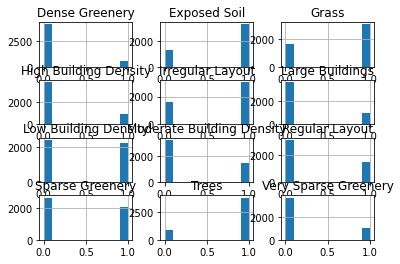

In [ ]:
clean_data.hist()

In [ ]:
len(train_x)

3878

In [ ]:
s = data.groupby("keys").ids.agg(lambda x:len(x.unique()))
pd.value_counts(s).plot(kind="bar")

AttributeError: ignored

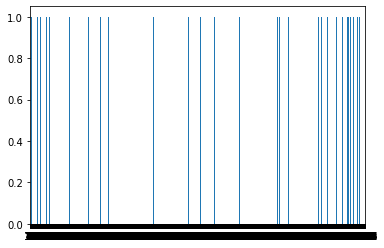

In [ ]:
a = data.drop_duplicates('content')
clean_data =  a.loc[a["content"].isin(names)]

print(clean_data[clean_data.columns.values[1]].value_counts())
print(clean_data[clean_data.columns.values[2]].value_counts())
print(clean_data[clean_data.columns.values[3]].value_counts())
print(clean_data[clean_data.columns.values[4]].value_counts())
print(clean_data[clean_data.columns.values[5]].value_counts())
print(clean_data[clean_data.columns.values[6]].value_counts())
print(clean_data[clean_data.columns.values[7]].value_counts())
print(clean_data[clean_data.columns.values[8]].value_counts())
print(clean_data[clean_data.columns.values[9]].value_counts())
print(clean_data[clean_data.columns.values[10]].value_counts())
print(clean_data[clean_data.columns.values[11]].value_counts())
print(clean_data[clean_data.columns.values[12]].value_counts())

0    3776
1     902
Name: High Building Density, dtype: int64
0    3199
1    1479
Name: Moderate Building Density, dtype: int64
0    2426
1    2252
Name: Low Building Density, dtype: int64
0    3150
1    1528
Name: Regular Layout, dtype: int64
1    3034
0    1644
Name: Irregular Layout, dtype: int64
0    4104
1     574
Name: Dense Greenery, dtype: int64
0    2640
1    2038
Name: Sparse Greenery, dtype: int64
0    3672
1    1006
Name: Very Sparse Greenery, dtype: int64
1    3025
0    1653
Name: Grass, dtype: int64
1    3833
0     845
Name: Trees, dtype: int64
0    3671
1    1007
Name: Large Buildings, dtype: int64
1    3335
0    1343
Name: Exposed Soil, dtype: int64


In [ ]:
data.header

AttributeError: ignored

In [ ]:
foc_loss_model = load_model("/content/drive/My Drive/focalLossModel.h5")
results = foc_loss_model.evaluate(validation_x,validation_y)
print(results)
print(sum(results[-12:])/len(results[-12:]))

ValueError: ignored

In [ ]:
focal_loss_pred = foc_loss_model.predict(validation_x)


NameError: ignored

In [ ]:
foc_loss_model = load_model("/content/drive/My Drive/focalLossModel.h5",custom_objects={'focal_loss_fixed': tfa.losses.focal_loss.SigmoidFocalCrossEntropy()})

ValueError: ignored

In [ ]:
model.compile(optimizer=adam, loss=SSD_Loss(neg_pos_ratio=neg_pos_ratio, alpha=alpha).compute_loss)